# Decision Tree

**Author**: Stephanie Golob

**contact**: estefaniagolob@gmail.com

**Date**: July 4, 2022

**Previous Notebook**: 5 of 7 (Logistic Regression)

**Notebook**: 6 of 7 (Decision Tree)

**Next Notebook**: 7 of 7 (XGBoost)

---

In this notebook I'm going to use Decision Tree Classifier models to see if I can improve the precision and recall scores for classes 2 and 3 using the original data and the balanced data sets.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Basic-Decision-Tree-Model" data-toc-modified-id="Basic-Decision-Tree-Model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic Decision Tree Model</a></span></li><li><span><a href="#Model-Optimization-using-original-and-balanced-data-sets" data-toc-modified-id="Model-Optimization-using-original-and-balanced-data-sets-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model Optimization using original and balanced data sets</a></span><ul class="toc-item"><li><span><a href="#Original-data" data-toc-modified-id="Original-data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Original data</a></span></li><li><span><a href="#Upsampled-Data" data-toc-modified-id="Upsampled-Data-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Upsampled Data</a></span></li><li><span><a href="#Downsampled-Data" data-toc-modified-id="Downsampled-Data-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Downsampled Data</a></span></li><li><span><a href="#SMOTEN-Upsampled-Data" data-toc-modified-id="SMOTEN-Upsampled-Data-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>SMOTEN Upsampled Data</a></span></li></ul></li><li><span><a href="#Model-Summary-Table" data-toc-modified-id="Model-Summary-Table-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Model Summary Table</a></span></li><li><span><a href="#Feature-Evaluation" data-toc-modified-id="Feature-Evaluation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Feature Evaluation</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

---

Import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# cache memory 
from tempfile import mkdtemp

# save model outputs
import joblib

# modeling
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# model evaluation metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# feature importance
import shap

Read in the X_train, y_train, X_validation and y_validation data sets.

In [2]:
X_train = pd.read_pickle("data/X_train.pkl")
y_train = pd.read_pickle("data/y_train.pkl")

X_validation = pd.read_pickle("data/X_validation.pkl")
y_validation = pd.read_pickle("data/y_validation.pkl")

---

## Basic Decision Tree Model

Fit a basic Decision Tree model using the original X_train and y_train data sets.

In [3]:
# instantiate the model using default settings
# use random_state = 10 to make the results reproducible
DT_model = DecisionTreeClassifier(random_state = 10)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  1.0
The Validation accuracy is:  0.6465816917728853


The model has overfit to the training data. The max depth needs to be optimized to prevent overfitting. Create a range of max depth values for the model to loop through and save accuracy scores on the training and validations sets for each max depth.

In [4]:
# list for storing accuracy for train and test
train_acc = []
val_acc = []

# start with a wide range of max depth values to see what is appropriate
depth = range(1, 40)

# loop over max_depth values
for d in depth:
    
    print(f"Fitting with max depth = {d}")
    
    # fit the tree
    my_tree = DecisionTreeClassifier(max_depth = d)
    my_tree.fit(X_train, y_train)
    
    # score on train and append accuracy to list
    train_acc.append(my_tree.score(X_train, y_train))
    
    # score on test and append to list
    val_acc.append(my_tree.score(X_validation, y_validation))

Fitting with max depth = 1
Fitting with max depth = 2
Fitting with max depth = 3
Fitting with max depth = 4
Fitting with max depth = 5
Fitting with max depth = 6
Fitting with max depth = 7
Fitting with max depth = 8
Fitting with max depth = 9
Fitting with max depth = 10
Fitting with max depth = 11
Fitting with max depth = 12
Fitting with max depth = 13
Fitting with max depth = 14
Fitting with max depth = 15
Fitting with max depth = 16
Fitting with max depth = 17
Fitting with max depth = 18
Fitting with max depth = 19
Fitting with max depth = 20
Fitting with max depth = 21
Fitting with max depth = 22
Fitting with max depth = 23
Fitting with max depth = 24
Fitting with max depth = 25
Fitting with max depth = 26
Fitting with max depth = 27
Fitting with max depth = 28
Fitting with max depth = 29
Fitting with max depth = 30
Fitting with max depth = 31
Fitting with max depth = 32
Fitting with max depth = 33
Fitting with max depth = 34
Fitting with max depth = 35
Fitting with max depth = 36
F

Plot the training and validation accuracy scores to see how the model performs with different max depth values.

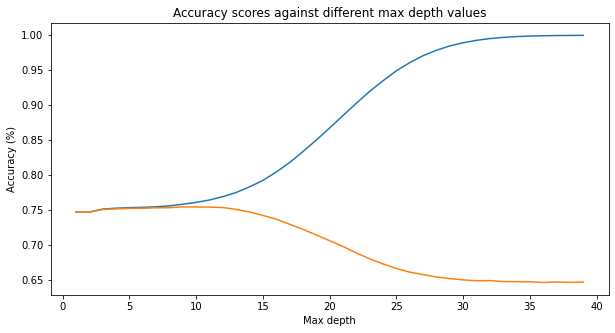

In [5]:
# plot the accuracy scores
plt.figure(figsize = (10, 5))

# plot the training and validation accuracy scores
plt.plot(depth, train_acc, label = "train")
plt.plot(depth, val_acc, label = "validation")

# set the plot title and axes labels
plt.title("Accuracy scores against different max depth values")
plt.xlabel("Max depth")
plt.ylabel("Accuracy (%)")

plt.show()

The model training and validation accuracy start to diverge around max depth of 15, the model starts to overfit strongly after this point. Around max depth 12 both the training and validation sets seemed to be optimized so I will re-run a Decision Tree model using max_depth = 12 to get a better idea of how the model is performing with its predictions.

In [6]:
# instantiate the model using max_depth = 12
DT_model = DecisionTreeClassifier(random_state = 10, max_depth = 12)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  0.769201675973979
The Validation accuracy is:  0.753631640741906


The training and validation scores are similar as expected from the plot above, meaning that the model has not overfit to the training data. I need to plot the confusion matrix and get the results from the classification report to know how the model is making predictions. 

Use `plot_confusion_matrix` and input the model and X_validation and y_validation data sets to get the predictions for each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


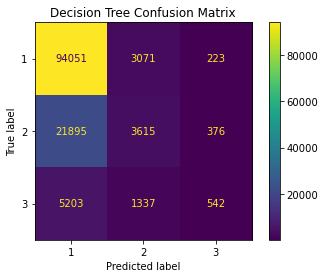

In [7]:
plot_confusion_matrix(DT_model, X_validation, y_validation)
plt.title("Decision Tree Confusion Matrix");

Calculate the model predictions using the X_validation set, which will be used to create the classification report.

In [8]:
y_predictions = DT_model.predict(X_validation)

Use y_validation and y_predictions to create the classification report which will output the precision, recall and f1-scores for each class.

In [9]:
report = classification_report(y_validation, y_predictions)
print(report)

              precision    recall  f1-score   support

           1       0.78      0.97      0.86     97345
           2       0.45      0.14      0.21     25886
           3       0.48      0.08      0.13      7082

    accuracy                           0.75    130313
   macro avg       0.57      0.39      0.40    130313
weighted avg       0.70      0.75      0.69    130313



The base Decision Tree model performs better than the base Logistic Regression model. Although it is still predicting class 1 most of the time, the precision and recall scores are comparatively better for classes 2 and 3. 

---

## Model Optimization using original and balanced data sets

I'm going to create a pipeline to optimize the Decision Tree models using the balanced and original data sets. I will then make predictions and compare the model outputs using the confusion matrices and precision, recall and f1-scores.

- First - original data
- Second - Upsampled data
- Third - Downsampled data
- Fourth - SMOTEN Upsampled data

### Original data

In [10]:
# create a directory to cache the memory in case the kernel crashes so it doesn't have to fit the grid from
# the beginning again
cachedir = mkdtemp()

# create a list of tuples to store the functions that will be completed in the pipeline
# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# intialize the pipeline, input estimators as the steps for the pipeline to take
# set the memory to cachedir
pipe = Pipeline(estimators, memory = cachedir)

# set the parameters that you want GridSearchCV to iterate through
# Loop through max depth values 1-30
# loop through min_samples_leaf values 1-1000, by steps of 100
# use decision tree classifier since it's a classification problem
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 31),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

orig_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

orig_fitgrid = orig_grid.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sa

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.4s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.5s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.6s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.7s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.8s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=22, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=23, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=25, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=26, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=101; total time=   1.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=201; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=28, model__min_samples_leaf=201; total time=   1.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=701; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=29, model__min_samples_leaf=701; total time=   0.9s
[CV] END m

Save the model output using `dump` from the joblib library.

In [11]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(orig_fitgrid, 'DT_orig_grid.pkl')

['DT_orig_grid.pkl']

View the results from gridsearchcv in a dataframe using `cv_results_` to get all the outputs from each cross-validation.

In [20]:
orig_df = pd.DataFrame(orig_fitgrid.cv_results_)
orig_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.288455,0.003227,0.048312,0.001084,"DecisionTreeClassifier(max_depth=11, min_sampl...",1,1,"{'model': DecisionTreeClassifier(max_depth=11,...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,264
1,0.284966,0.001173,0.047357,0.000155,"DecisionTreeClassifier(max_depth=11, min_sampl...",1,101,"{'model': DecisionTreeClassifier(max_depth=11,...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,264
2,0.285324,0.002894,0.047349,0.000510,"DecisionTreeClassifier(max_depth=11, min_sampl...",1,201,"{'model': DecisionTreeClassifier(max_depth=11,...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,264
3,0.284276,0.002648,0.047480,0.000531,"DecisionTreeClassifier(max_depth=11, min_sampl...",1,301,"{'model': DecisionTreeClassifier(max_depth=11,...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,264
4,0.283609,0.003757,0.047204,0.000289,"DecisionTreeClassifier(max_depth=11, min_sampl...",1,401,"{'model': DecisionTreeClassifier(max_depth=11,...",0.747011,0.747011,0.747024,0.747007,0.747024,0.747015,0.000007,264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.856674,0.012737,0.051111,0.000373,"DecisionTreeClassifier(max_depth=11, min_sampl...",30,501,"{'model': DecisionTreeClassifier(max_depth=11,...",0.753770,0.753704,0.753486,0.754391,0.751447,0.753360,0.001002,116
296,0.841298,0.016540,0.050908,0.000454,"DecisionTreeClassifier(max_depth=11, min_sampl...",30,601,"{'model': DecisionTreeClassifier(max_depth=11,...",0.754460,0.754016,0.754243,0.754539,0.751200,0.753692,0.001259,68
297,0.823446,0.008239,0.050956,0.000603,"DecisionTreeClassifier(max_depth=11, min_sampl...",30,701,"{'model': DecisionTreeClassifier(max_depth=11,...",0.753901,0.753622,0.753453,0.754769,0.751842,0.753517,0.000952,94
298,0.804266,0.008045,0.050456,0.000249,"DecisionTreeClassifier(max_depth=11, min_sampl...",30,801,"{'model': DecisionTreeClassifier(max_depth=11,...",0.753392,0.753309,0.752796,0.754341,0.750559,0.752879,0.001263,171


Use `best_estimator_` to get the parameters for the best model given by gridsearchcv.

In [12]:
orig_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmpdssiv94c',
         steps=[('model',
                 DecisionTreeClassifier(max_depth=11, min_samples_leaf=101))])

The best parameters selected by gridsearchcv were a max depth of 11 and a min samples leaf size of 101. 

Fit a Decision Tree model with the parameters given by the best_estimator_ output.

In [13]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model = DecisionTreeClassifier(random_state = 10, max_depth = 11, min_samples_leaf = 101)

# fit the model on the X_train and y_train data
DT_model.fit(X_train, y_train)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model.score(X_train, y_train)}")
print(f"The Validation accuracy is:  {DT_model.score(X_validation, y_validation)}")

The Training accuracy is:  0.7585295104287941
The Validation accuracy is:  0.7552431453500418


The training and validation accuracy is very similar, the model did not overfit to the training data. Look at confusion matrix and classification report to understand how the model is making predictions for each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


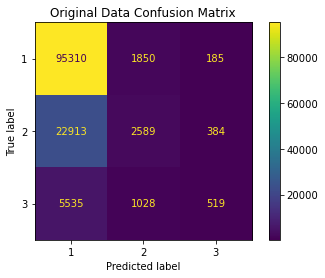

In [14]:
plot_confusion_matrix(DT_model, X_validation, y_validation)
plt.title("Original Data Confusion Matrix");

The model is still predicting class 1 primarily. I need to review the precision, recall and f1-scores to see if this is an improvement over the base model with some max depth tuning.

Calculate the model predictions using X_validation.

In [15]:
y_predictions_orig = DT_model.predict(X_validation)

Create a classification report using the predictions and y_validation.

In [16]:
report_orig = classification_report(y_validation, y_predictions_orig)
print(report_orig)

              precision    recall  f1-score   support

           1       0.77      0.98      0.86     97345
           2       0.47      0.10      0.17     25886
           3       0.48      0.07      0.13      7082

    accuracy                           0.76    130313
   macro avg       0.57      0.38      0.38    130313
weighted avg       0.70      0.76      0.68    130313



The optimized Decision Tree model is performing worse than the base Decision Tree model with some max depth tuning. The precision scores remain approximately the same, while the recall scores for classes 2 and 3 are lower than before I'm going to re-run this experiment using the upsampled data next and see if the f1-scores improve further.

---

### Upsampled Data

Read in X_train and y_train upsampled data sets.

In [17]:
X_train_up = pd.read_pickle("data/X_train_over.pkl")
y_train_up = pd.read_pickle("data/y_train_over.pkl")

Create a pipeline to optimize the Decision Tree model using `gridsearchcv` to perform cross-validation of the training data.

In [18]:
# set the cachedir
cachedir2 = mkdtemp()

# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# instantiate the pipeline and add input the etimators and memory
pipe = Pipeline(estimators, memory = cachedir2)


# choose what parameters to include
# I'm reducing the max depth range since from the initial model it started to overfit with max depth >15
# and to reduce run-time
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 21),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

# instantiate the grid
up_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

# fit the grid on the upsampled X_train_up and y_train_up data
up_fitgrid = up_grid.fit(X_train_up, y_train_up)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sa

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.2s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.7s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.8s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.0s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.3s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.4s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.2s
[CV] END m

Save the model output.

In [19]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(up_fitgrid, 'DT_up_grid.pkl')

['DT_up_grid.pkl']

Store the results of gridsearchcv in a dataframe.

In [21]:
up_df = pd.DataFrame(up_fitgrid.cv_results_)
up_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.674942,0.008500,0.115366,0.003583,DecisionTreeClassifier(max_depth=20),1,1,{'model': DecisionTreeClassifier(max_depth=20)...,0.386913,0.385907,0.385866,0.384597,0.386042,0.385865,0.000740,191
1,0.666177,0.009778,0.114376,0.000751,DecisionTreeClassifier(max_depth=20),1,101,{'model': DecisionTreeClassifier(max_depth=20)...,0.386913,0.385907,0.385866,0.384597,0.386042,0.385865,0.000740,191
2,0.670157,0.015436,0.114905,0.001294,DecisionTreeClassifier(max_depth=20),1,201,{'model': DecisionTreeClassifier(max_depth=20)...,0.386913,0.385907,0.385866,0.384597,0.386042,0.385865,0.000740,191
3,0.664342,0.008806,0.114693,0.000506,DecisionTreeClassifier(max_depth=20),1,301,{'model': DecisionTreeClassifier(max_depth=20)...,0.386913,0.385907,0.385866,0.384597,0.386042,0.385865,0.000740,191
4,0.661891,0.005487,0.114728,0.001709,DecisionTreeClassifier(max_depth=20),1,401,{'model': DecisionTreeClassifier(max_depth=20)...,0.386913,0.385907,0.385866,0.384597,0.386042,0.385865,0.000740,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.084132,0.049945,0.123482,0.001157,DecisionTreeClassifier(max_depth=20),20,501,{'model': DecisionTreeClassifier(max_depth=20)...,0.511183,0.514881,0.517100,0.514224,0.515970,0.514672,0.002000,45
196,2.095955,0.026800,0.124606,0.001734,DecisionTreeClassifier(max_depth=20),20,601,{'model': DecisionTreeClassifier(max_depth=20)...,0.507859,0.511146,0.514261,0.510871,0.510526,0.510932,0.002037,56
197,2.051603,0.021656,0.123863,0.001314,DecisionTreeClassifier(max_depth=20),20,701,{'model': DecisionTreeClassifier(max_depth=20)...,0.505283,0.508702,0.511384,0.508743,0.510284,0.508879,0.002061,65
198,2.002532,0.042362,0.123118,0.002153,DecisionTreeClassifier(max_depth=20),20,801,{'model': DecisionTreeClassifier(max_depth=20)...,0.503082,0.504718,0.507517,0.506204,0.507341,0.505773,0.001676,79


Get the best parameters from gridsearchcv using `best_estimator`.

In [22]:
up_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmp_oo39prt',
         steps=[('model', DecisionTreeClassifier(max_depth=20))])

Use the parameters selected from gridsearchcv to fit another Decision Tree model. 

In [23]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_up = DecisionTreeClassifier(random_state = 10, max_depth = 20)

# fit the model on the X_train and y_train data
DT_model_up.fit(X_train_up, y_train_up)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_up.score(X_train_up, y_train_up)}")
print(f"The Validation accuracy is:  {DT_model_up.score(X_validation, y_validation)}")

The Training accuracy is:  0.8205606845734696
The Validation accuracy is:  0.5771258431622325


The Decision Tree model using the upsampled data seems to be overfitting on the training data. I need to check the results from the confusion matrix and the classification report to see how it's predicting each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


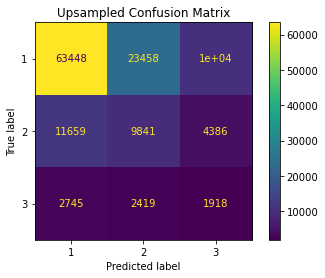

In [24]:
plot_confusion_matrix(DT_model_up, X_validation, y_validation)
plt.title("Upsampled Confusion Matrix");

This model is doing a better job of predicting classes 2 and 3. The precision, recall and f1-scores can give a better indication of this.

In [25]:
y_predictions_up = DT_model_up.predict(X_validation)

In [26]:
report_up = classification_report(y_validation, y_predictions_up)
print(report_up)

              precision    recall  f1-score   support

           1       0.81      0.65      0.72     97345
           2       0.28      0.38      0.32     25886
           3       0.11      0.27      0.16      7082

    accuracy                           0.58    130313
   macro avg       0.40      0.43      0.40    130313
weighted avg       0.67      0.58      0.61    130313



The Decision Tree model using the upsampled data produces better recall scores for classes 2 and 3. They're still fairly low, but the f1-scores have improved as compared to the imbalanced original data set.

---

### Downsampled Data

In [27]:
X_train_down = pd.read_pickle("data/X_train_under.pkl")
y_train_down = pd.read_pickle("data/y_train_under.pkl")

In [28]:
# set the cachedir
cachedir3 = mkdtemp()

# instantiate the Decision Tree model
estimators = [('model', DecisionTreeClassifier())]

# instantiate the pipeline and add input the etimators and memory
pipe = Pipeline(estimators, memory = cachedir3)

# choose what parameters to include
parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 21),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

# fit the grid, input the pipeline, the parameters and the number of cross-validation folds to include
down_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

down_fitgrid = down_grid.fit(X_train_down, y_train_down)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sa

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=Decisi

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=401; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=901; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=401; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=901; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=401; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=901; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=301; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=401; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=401; total time=   0.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=801; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=901; total time=   0.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=901; total time=   0.1s


Save the model output.

In [29]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(down_fitgrid, 'DT_down_grid.pkl')

['DT_down_grid.pkl']

Get the results using `cv_results_`.

In [30]:
down_df = pd.DataFrame(down_fitgrid.cv_results_)
down_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.041666,0.001375,0.007240,0.000142,DecisionTreeClassifier(max_depth=10),1,1,{'model': DecisionTreeClassifier(max_depth=10)...,0.391225,0.379728,0.390861,0.371797,0.377648,0.382252,0.007636,191
1,0.041747,0.000561,0.007268,0.000207,DecisionTreeClassifier(max_depth=10),1,101,{'model': DecisionTreeClassifier(max_depth=10)...,0.391225,0.379728,0.390861,0.371797,0.377648,0.382252,0.007636,191
2,0.041713,0.000425,0.007290,0.000133,DecisionTreeClassifier(max_depth=10),1,201,{'model': DecisionTreeClassifier(max_depth=10)...,0.391225,0.379728,0.390861,0.371797,0.377648,0.382252,0.007636,191
3,0.042116,0.000544,0.007420,0.000300,DecisionTreeClassifier(max_depth=10),1,301,{'model': DecisionTreeClassifier(max_depth=10)...,0.391225,0.379728,0.390861,0.371797,0.377648,0.382252,0.007636,191
4,0.041515,0.001190,0.007299,0.000317,DecisionTreeClassifier(max_depth=10),1,401,{'model': DecisionTreeClassifier(max_depth=10)...,0.391225,0.379728,0.390861,0.371797,0.377648,0.382252,0.007636,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.102131,0.001463,0.007828,0.000248,DecisionTreeClassifier(max_depth=10),20,501,{'model': DecisionTreeClassifier(max_depth=10)...,0.465255,0.469390,0.471858,0.468731,0.462780,0.467603,0.003205,67
196,0.099562,0.001712,0.007831,0.000157,DecisionTreeClassifier(max_depth=10),20,601,{'model': DecisionTreeClassifier(max_depth=10)...,0.459506,0.462733,0.469841,0.464596,0.456526,0.462640,0.004536,87
197,0.096723,0.000898,0.007898,0.000208,DecisionTreeClassifier(max_depth=10),20,701,{'model': DecisionTreeClassifier(max_depth=10)...,0.460313,0.457085,0.461670,0.461267,0.455316,0.459130,0.002496,107
198,0.093967,0.001514,0.007735,0.000164,DecisionTreeClassifier(max_depth=10),20,801,{'model': DecisionTreeClassifier(max_depth=10)...,0.458396,0.459102,0.462780,0.458543,0.455215,0.458807,0.002409,119


Get the best estimator from gridsearchcv.

In [31]:
down_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmp7069rpql',
         steps=[('model', DecisionTreeClassifier(max_depth=10))])

Use the best_estimator_ outputs from gridsearchcv to fit another decision tree model.

In [32]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_down = DecisionTreeClassifier(random_state = 10, max_depth = 10)

# fit the model on the X_train and y_train data
DT_model_down.fit(X_train_down, y_train_down)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_down.score(X_train_down, y_train_down)}")
print(f"The Validation accuracy is:  {DT_model_down.score(X_validation, y_validation)}")

The Training accuracy is:  0.5359275397401759
The Validation accuracy is:  0.5501906947119627


The training and accuracy scores are low for this model, but I will check the confusion matrix and classification report to see how it predicts each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


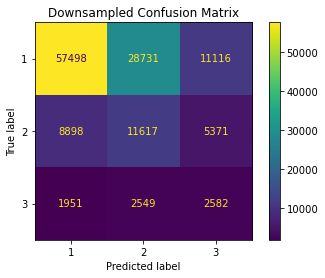

In [33]:
plot_confusion_matrix(DT_model_down, X_validation, y_validation)
plt.title("Downsampled Confusion Matrix");

This model does a much better job of predicting classes 2 and 3, as compared to the original and upsampled data sets. The precision, recall and f1-scores will give a better indication of the model performance.

Get the model predictions using X_validation.

In [34]:
y_predictions_down = DT_model_down.predict(X_validation)

Create a classification report using y_validation and the predictions calculated above.

In [35]:
report_down = classification_report(y_validation, y_predictions_down)
print(report_down)

              precision    recall  f1-score   support

           1       0.84      0.59      0.69     97345
           2       0.27      0.45      0.34     25886
           3       0.14      0.36      0.20      7082

    accuracy                           0.55    130313
   macro avg       0.42      0.47      0.41    130313
weighted avg       0.69      0.55      0.60    130313



The recall scores for classes 2 and 3 have improved as compared to the imbalanced and upsampled data. The f1-scores are the highest so far for classes 2 and 3, showing the best mean of the precision and recall scores for these classes. 

---

### SMOTEN Upsampled Data

Read in the SMOTEN upsampled data.

In [36]:
X_train_smote = pd.read_pickle("data/X_train_smote.pkl")
y_train_smote = pd.read_pickle("data/y_train_smote.pkl")

In [37]:
cachedir4 = mkdtemp()

estimators = [('model', DecisionTreeClassifier())]

pipe = Pipeline(estimators, memory = cachedir4)

parameters = [
            {'model': [DecisionTreeClassifier()],
             'model__max_depth': np.arange(1, 21),
             'model__min_samples_leaf': np.arange(1, 1000, 100)
            }
]

smote_grid = GridSearchCV(pipe, parameters, cv = 5, verbose = 2)

smote_fitgrid = smote_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=1; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_samples_leaf=101; total time=   0.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=1, model__min_sa

[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=501; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   0.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=DecisionTreeClassifier(), model__max_depth=2, model__min_samples_leaf=601; total time=   1.0s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=1; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=4, model__min_samples_leaf=101; total time=   1.3s
[CV] END model=DecisionTree

[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=501; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=601; total time=   1.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=5, model__min_samples_leaf=701; total time=   1.4s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=1; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=101; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=7, model__min_samples_leaf=201; total time=   1.7s
[CV] END model=Decision

[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=501; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=601; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.8s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.9s
[CV] END model=DecisionTreeClassifier(), model__max_depth=8, model__min_samples_leaf=701; total time=   1.8s
[CV] END model=Deci

[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=101; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=10, model__min_samples_leaf=201; total time=   2.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=601; total time=   2.2s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.1s
[CV] END model=DecisionTreeClassifier(), model__max_depth=11, model__min_samples_leaf=701; total time=   2.1s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=101; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=13, model__min_samples_leaf=201; total time=   2.4s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=14, model__min_samples_leaf=701; total time=   2.2s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=101; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=16, model__min_samples_leaf=201; total time=   2.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=17, model__min_samples_leaf=701; total time=   2.3s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=101; total time=   2.7s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.5s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.6s
[CV] END model=DecisionTreeClassifier(), model__max_depth=19, model__min_samples_leaf=201; total time=   2.5s
[CV] END m

[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.4s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=601; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.3s
[CV] END model=DecisionTreeClassifier(), model__max_depth=20, model__min_samples_leaf=701; total time=   2.3s
[CV] END m

Save the model output.

In [38]:
# select the output to save and give it a name
# saves as a .pkl file

joblib.dump(smote_fitgrid, 'DT_smote_grid.pkl')

['DT_smote_grid.pkl']

Store the results of gridsearchcv using `cv_results_`.

In [39]:
smote_df = pd.DataFrame(smote_fitgrid.cv_results_)
smote_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__max_depth,param_model__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.674347,0.002988,0.116846,0.002783,DecisionTreeClassifier(max_depth=20),1,1,{'model': DecisionTreeClassifier(max_depth=20)...,0.379502,0.390457,0.381999,0.389579,0.393343,0.386976,0.005293,191
1,0.683908,0.012345,0.116382,0.001016,DecisionTreeClassifier(max_depth=20),1,101,{'model': DecisionTreeClassifier(max_depth=20)...,0.379502,0.390457,0.381999,0.389579,0.393343,0.386976,0.005293,191
2,0.685914,0.010105,0.115735,0.000850,DecisionTreeClassifier(max_depth=20),1,201,{'model': DecisionTreeClassifier(max_depth=20)...,0.379502,0.390457,0.381999,0.389579,0.393343,0.386976,0.005293,191
3,0.679650,0.007686,0.115605,0.000708,DecisionTreeClassifier(max_depth=20),1,301,{'model': DecisionTreeClassifier(max_depth=20)...,0.379502,0.390457,0.381999,0.389579,0.393343,0.386976,0.005293,191
4,0.675502,0.005647,0.115622,0.000787,DecisionTreeClassifier(max_depth=20),1,401,{'model': DecisionTreeClassifier(max_depth=20)...,0.379502,0.390457,0.381999,0.389579,0.393343,0.386976,0.005293,191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.250057,0.028418,0.126686,0.000658,DecisionTreeClassifier(max_depth=20),20,501,{'model': DecisionTreeClassifier(max_depth=20)...,0.530106,0.561306,0.544081,0.561699,0.558874,0.551213,0.012384,42
196,2.200381,0.018514,0.126023,0.000792,DecisionTreeClassifier(max_depth=20),20,601,{'model': DecisionTreeClassifier(max_depth=20)...,0.523172,0.551459,0.536655,0.553679,0.555440,0.544081,0.012393,54
197,2.170618,0.018769,0.125825,0.000991,DecisionTreeClassifier(max_depth=20),20,701,{'model': DecisionTreeClassifier(max_depth=20)...,0.517867,0.549235,0.531130,0.548726,0.549738,0.539339,0.012827,64
198,2.135473,0.013210,0.125725,0.001201,DecisionTreeClassifier(max_depth=20),20,801,{'model': DecisionTreeClassifier(max_depth=20)...,0.515446,0.542485,0.527527,0.541337,0.542658,0.533890,0.010834,77


Get the best parameters from gridsearchcv using `best_estimator_`.

In [41]:
smote_fitgrid.best_estimator_

Pipeline(memory='/var/folders/z5/1yfbtl1s4fvfx1dypyr78xq40000gn/T/tmpgfir606w',
         steps=[('model', DecisionTreeClassifier(max_depth=20))])

Gridsearchcv has output a max depth of 20 as the optimal parameter setting for this model.

In [42]:
# instantiate the model using the parameters given by the best_estimator_ output
DT_model_smote = DecisionTreeClassifier(random_state = 10, max_depth = 20)

# fit the model on the X_train and y_train data
DT_model_smote.fit(X_train_smote, y_train_smote)

# check the accuracy score on the training and validation sets
print(f"The Training accuracy is:  {DT_model_smote.score(X_train_smote, y_train_smote)}")
print(f"The Validation accuracy is:  {DT_model_smote.score(X_validation, y_validation)}")

The Training accuracy is:  0.8327265096115888
The Validation accuracy is:  0.6461212618848465


Re-fitting a Decision Tree model using the gridsearch parameter causes the model to overfit on the training data. I need to check the confusion matrix, and the classification report to see how the model predicts each class.

/Users/stephgolob/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


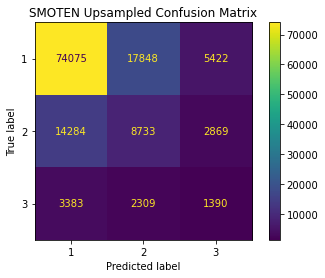

In [43]:
plot_confusion_matrix(DT_model_smote, X_validation, y_validation)
plt.title("SMOTEN Upsampled Confusion Matrix");

The model is predicting classes 2 and 3, but it is performing worse than the downsampled data.

Calculate the predictions using X_validation.

In [44]:
y_predictions_smote = DT_model_smote.predict(X_validation)

Create the classification report using y_validation and the predictions calculated above.

In [45]:
report_smote = classification_report(y_validation, y_predictions_smote)
print(report_smote)

              precision    recall  f1-score   support

           1       0.81      0.76      0.78     97345
           2       0.30      0.34      0.32     25886
           3       0.14      0.20      0.17      7082

    accuracy                           0.65    130313
   macro avg       0.42      0.43      0.42    130313
weighted avg       0.67      0.65      0.66    130313



Using the SMOTEN upsampled data the precision and recall scores have improved as compared to the base model but it doesn't perform as well as the downsampled data. 

---

## Model Summary Table

The results of the classification reports of each model are summarized in the table below.

| Data        | Class   | Precision | Recall | F1   |
|-------------|---------|-----------|--------|------|
| Original    |         |           |        |      |
|             | Class 1 | 0.77      | 0.98   | 0.86 |
|             | Class 2 | 0.47      | 0.10   | 0.17 |
|             | Class 3 | 0.48      | 0.07   | 0.13 |
| Upsampled   |         |           |        |      |
|             | Class 1 | 0.81      | 0.65   | 0.72 |
|             | Class 2 | 0.28      | 0.38   | 0.32 |
|             | Class 3 | 0.11      | 0.27   | 0.16 |
| Downsampled |         |           |        |      |
|             | Class 1 | 0.84      | 0.59   | 0.69 |
|             | Class 2 | 0.27      | 0.45   | 0.34 |
|             | Class 3 | 0.14      | 0.36   | 0.20 |
| SMOTEN      |         |           |        |      |
|             | Class 1 | 0.81      | 0.76   | 0.78 |
|             | Class 2 | 0.30      | 0.34   | 0.32 |
|             | Class 3 | 0.14      | 0.20   | 0.17 |

---

## Feature Evaluation

The best results from the optimized models were from the downsampled data sets. I will evaluate the features using the downsampled data.

Install the shap library using pip install.

In [67]:
!pip install shap

     |████████████████████████████████| 436 kB 2.0 MB/s eta 0:00:01


Use shap `TreeExplainer` to calculate shap values for a decision tree model.

In [69]:
# use the decision tree model with downsampled data
explainer = shap.TreeExplainer(DT_model_down)

# use the explainer to calculate the shap values and input the downsampled X_train_down data
shap_values = explainer.shap_values(X_train_down)

In [70]:
# create a list of the class names to be used in the shap summary plot
class_names = ["on-time", "0-30 min delay", "30-120 min delay"]

Plot the shap values using `summary_plot`. I'm plotting the values individually for each class to make interpretation easier. 

Shap summary plot for class 1 (On-time flights).

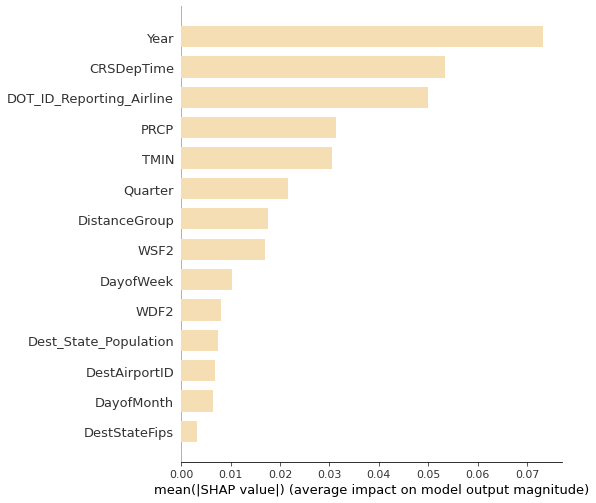

In [100]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 1
shap.summary_plot(shap_values[0], X_train_down.values, 
                  plot_type = "bar", class_names = class_names, 
                  feature_names = X_train.columns, color = 'wheat')

The results of the shapley summary plot show that Year is the biggest predictor of on-time flights.

---

Shap summary plot for class 2 (0-30 minute flight delay).

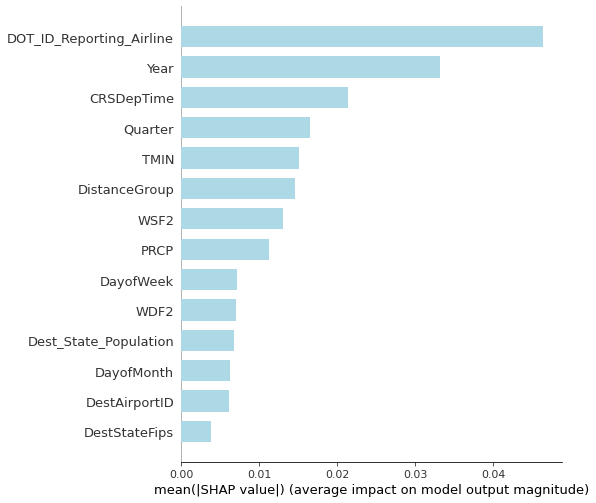

In [101]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 2
shap.summary_plot(shap_values[1], X_train_down.values, 
                  plot_type = "bar", class_names = class_names, 
                  feature_names = X_train.columns, color = "lightblue")

The results of the shapley summary plot show that Reporting Airline is the biggest predictor of 0-30 minute delayed flights.

---

Shap summary plot for class 3 (30-120 minute flight delay).

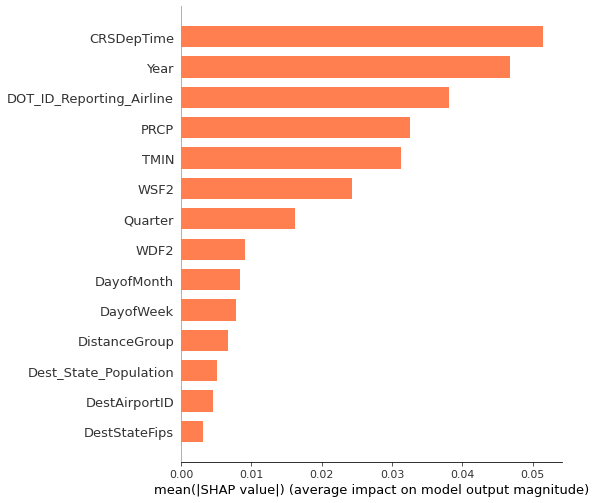

In [102]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 3
shap.summary_plot(shap_values[2], X_train_down.values, 
                  plot_type = "bar", class_names = class_names, 
                  feature_names = X_train.columns, color = "coral")

The results of the shapley summary plot show that Departure Time is the biggest predictor of 30-120 minute delayed flights.

---

The plots above show which features are most important in predicting each class, but they don't show how the feature values are affecting the predictions.

The same shapley values can be used for global interpretation of the features. Plots are created for each class and explained below.

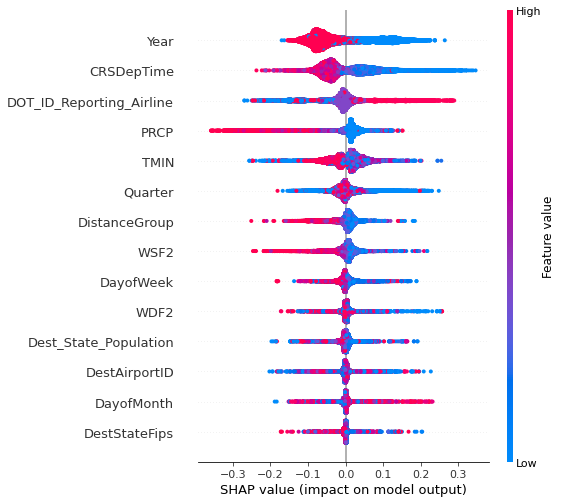

In [103]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 1
shap.summary_plot(shap_values[0], X_train_down.values, feature_names = X_train.columns)


As shown above Year is the biggest predictor for on-time flights. This plot shows that higher values for Year (2021) have a negative impact on predicting on-time flights, meaning that more flights were on-time in 2020.

---

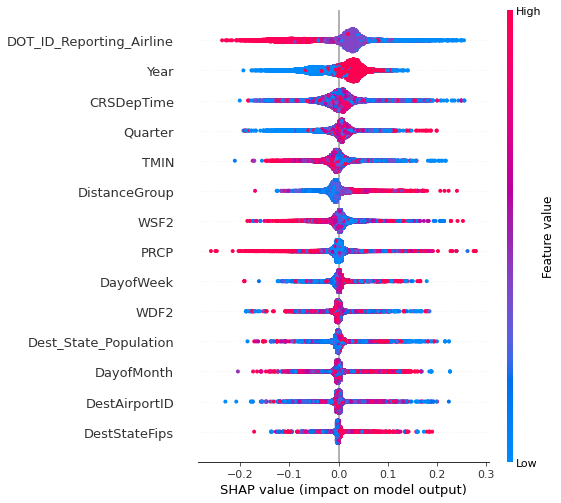

In [104]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 2
shap.summary_plot(shap_values[1], X_train_down.values, feature_names = X_train.columns)


For class 2 the Reporting Airline was the biggest predictor, this plot shows that certain airlines are more predictive of a delay.

---

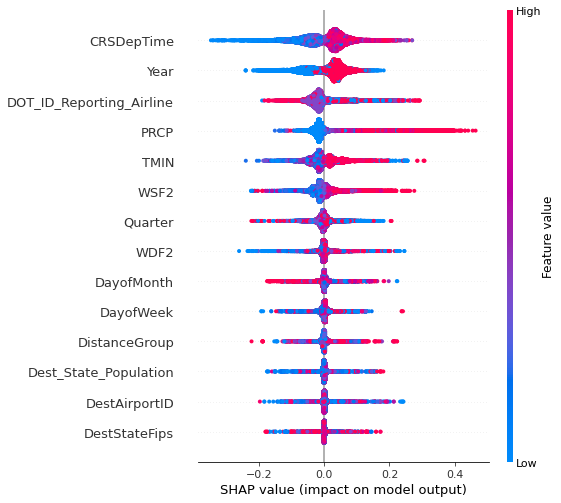

In [105]:
# Initiate Javascript for visualization 
shap.initjs()

# Class 3
shap.summary_plot(shap_values[2], X_train_down.values, feature_names = X_train.columns)


For class 3 Departure Time was the biggest predictor, this plot shows that a later departure time is a bigger predictor of extreme delays. 

---

## Next Steps

In the final notebook (Notebook 7) I will explore XGBoost models to see if I can further improve the f1-scores for classes 2 and 3.

---